In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
PATH = "./data/"

In [6]:
df_0 = pd.read_csv(PATH + "train-metadata.csv")

/tmp/ipykernel_29842/1877868789.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_0 = pd.read_csv(PATH + "train-metadata.csv")


In [7]:
# Clean and preprocess data for training and testing 

cols_to_drop = ["isic_id", "patient_id", "iddx_full", "iddx_1", "iddx_2", "iddx_3", "iddx_4", "iddx_5", "attribution", "copyright_license", "tbp_lv_location", "tbp_lv_location_simple", "tbp_lv_dnn_lesion_confidence", "anatom_site_general", "image_type", "tbp_tile_type"]
df_0.drop(columns=cols_to_drop, inplace=True)
df_0["sex"] = df_0["sex"].replace({"male": 1, "female": 0})

# replace all NaNs with np.nan
df_0.replace("", np.nan, inplace=True)

# Drop any column with a string vallue 
for col in df_0.columns:
    if df_0[col].dtype == "object":
        df_0.drop(columns=[col], inplace=True)

In [10]:
df_0.keys()

Index(['target', 'age_approx', 'sex', 'clin_size_long_diam_mm', 'tbp_lv_A',
       'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext',
       'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'mel_thick_mm'],
      dtype='object')

In [11]:
mal_df = df_0[df_0["target"] == 1]
ben_df = df_0[df_0["target"] == 0]

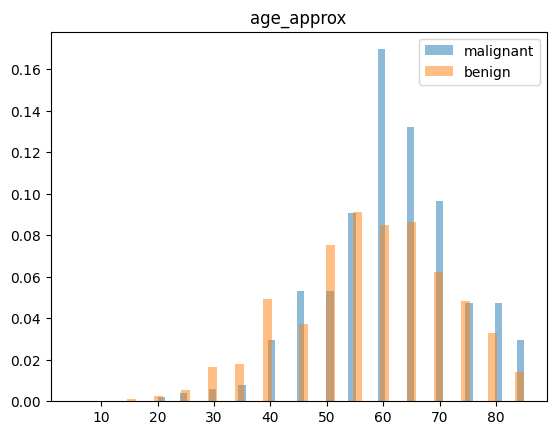

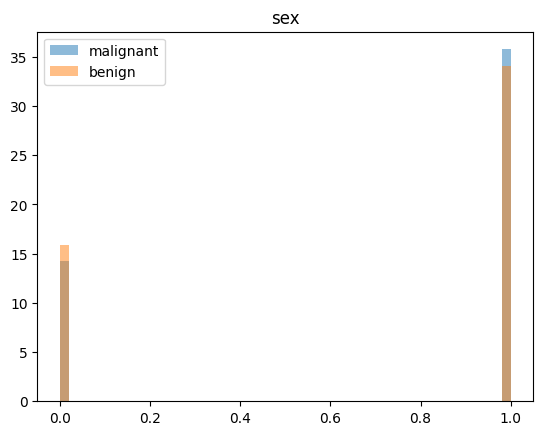

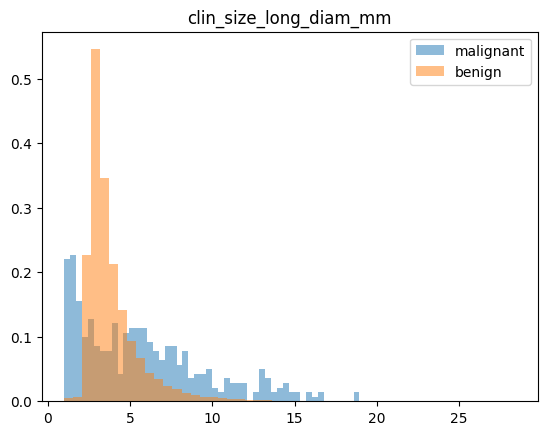

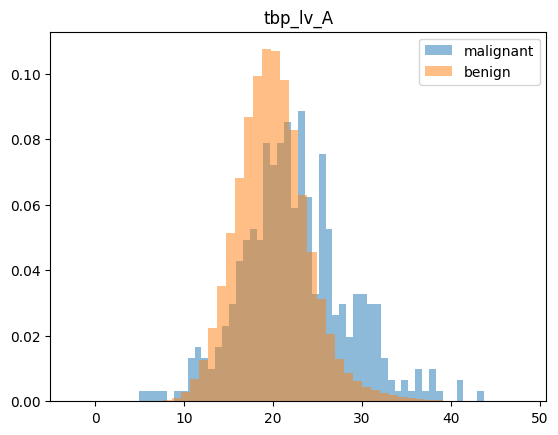

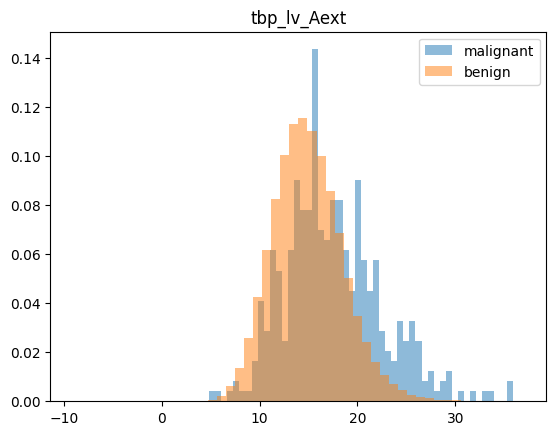

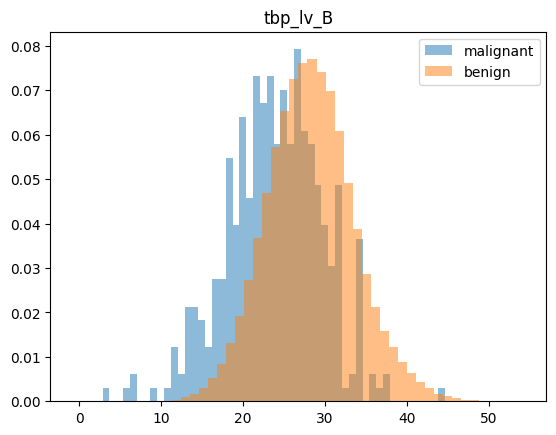

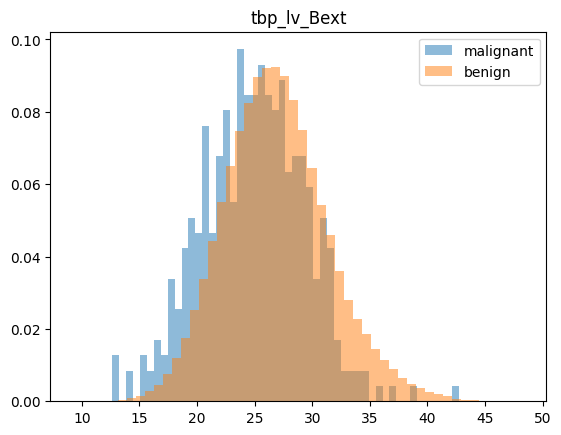

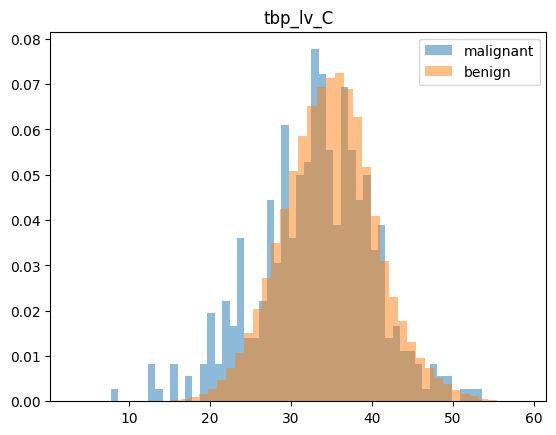

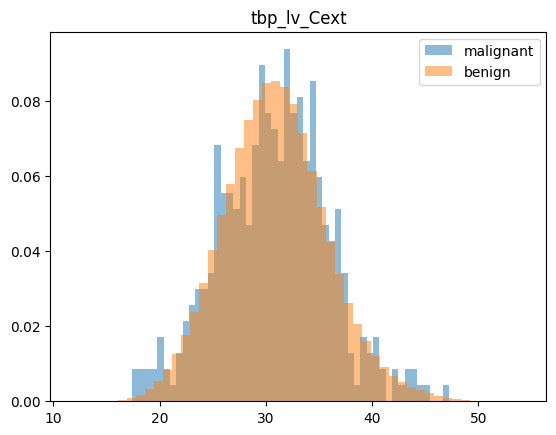

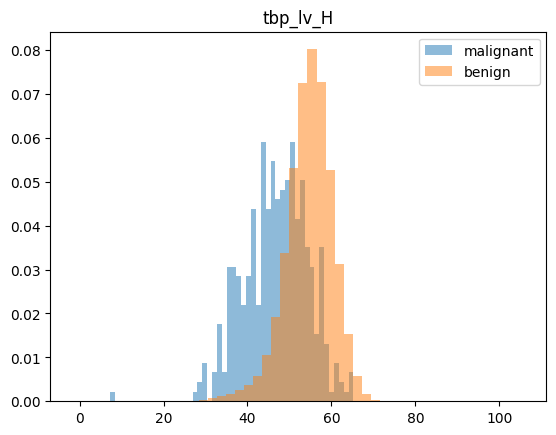

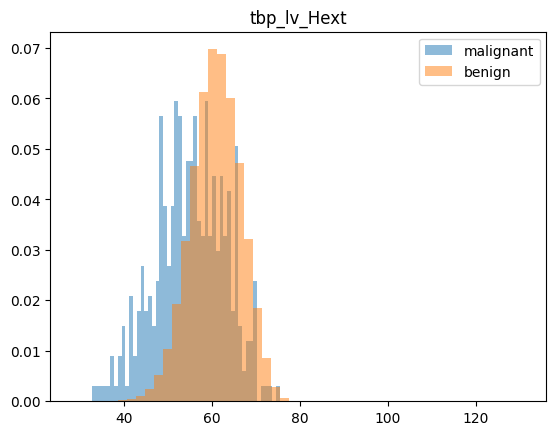

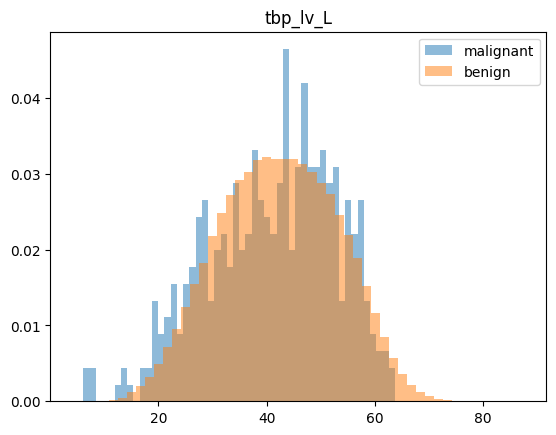

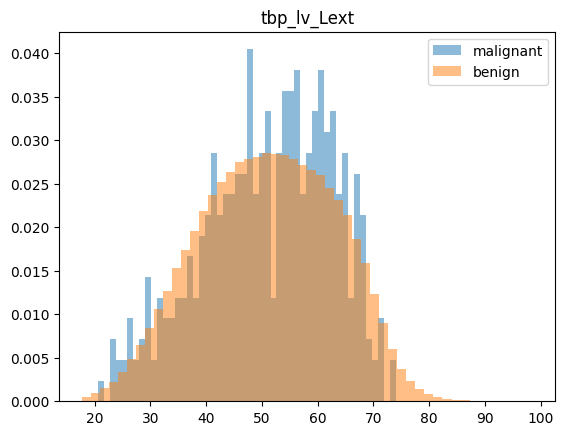

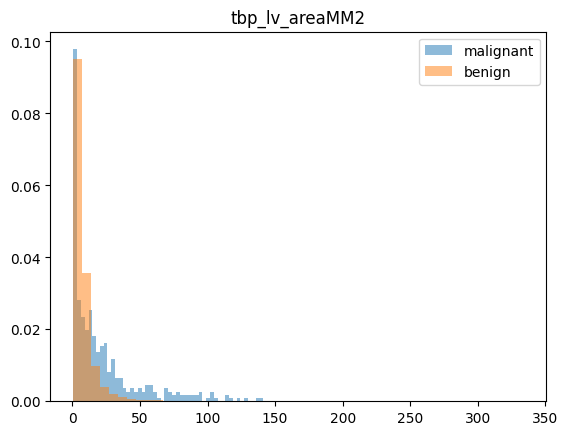

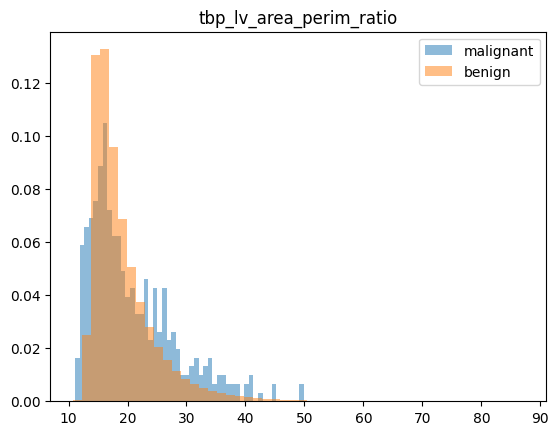

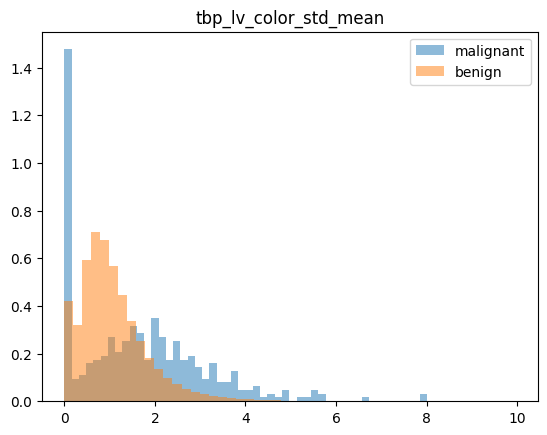

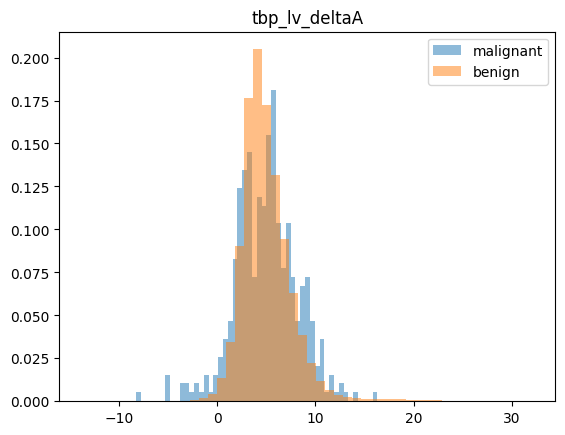

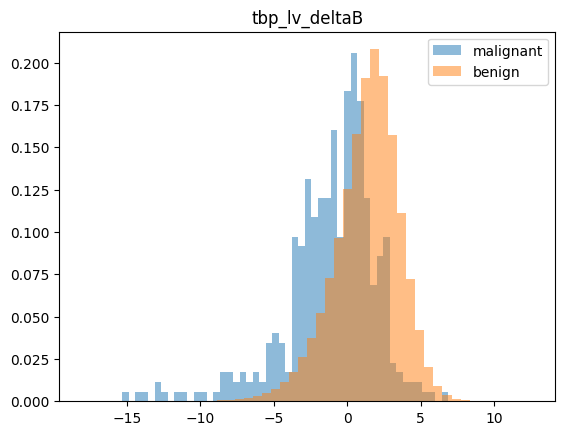

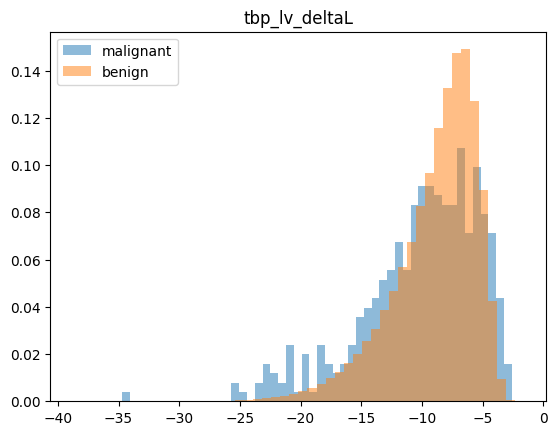

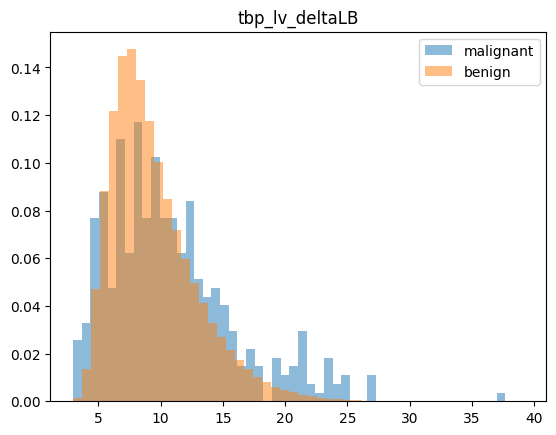

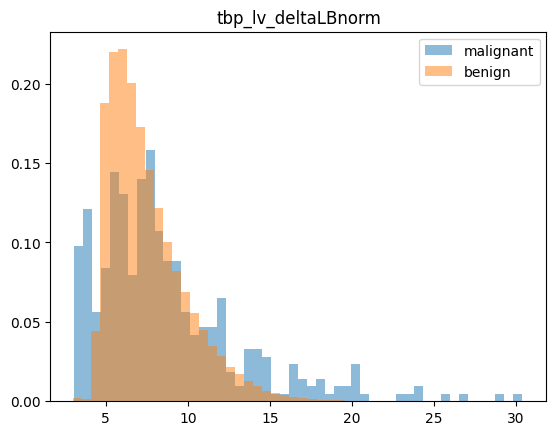

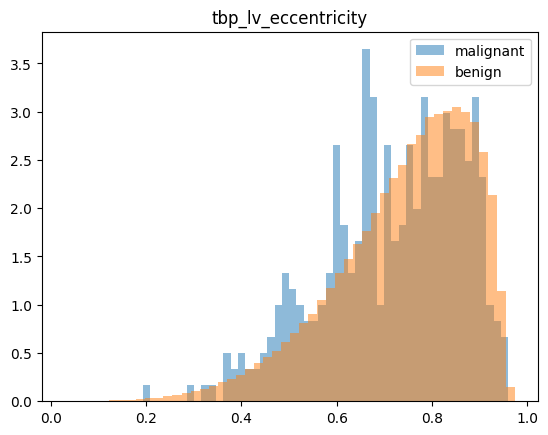

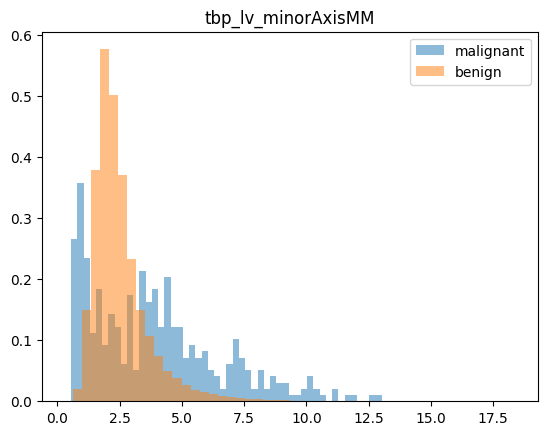

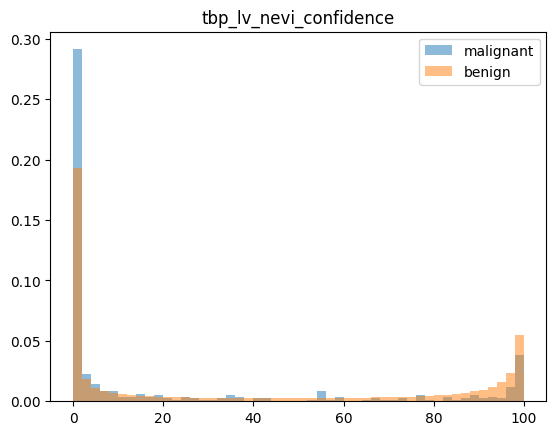

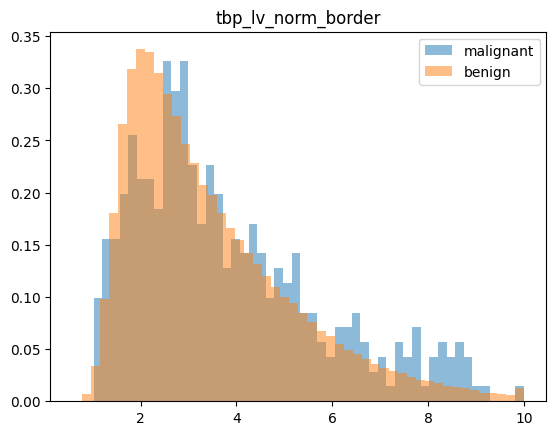

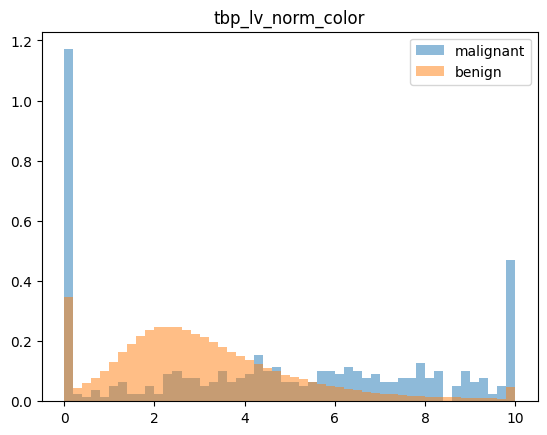

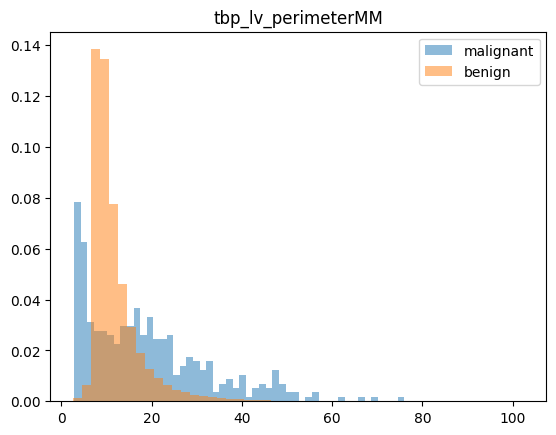

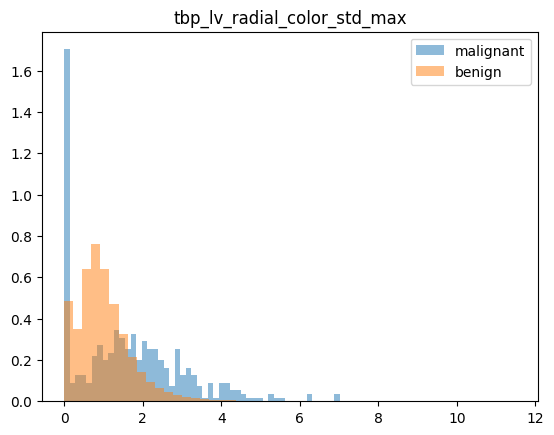

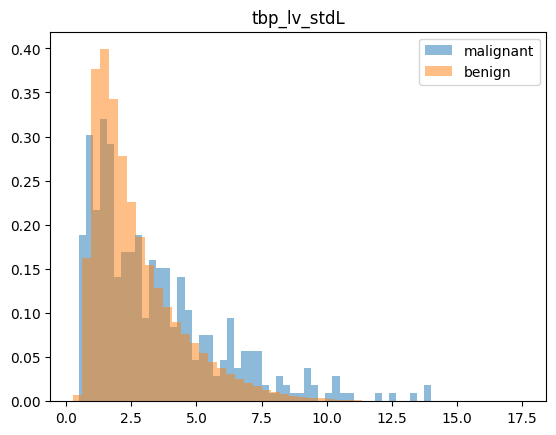

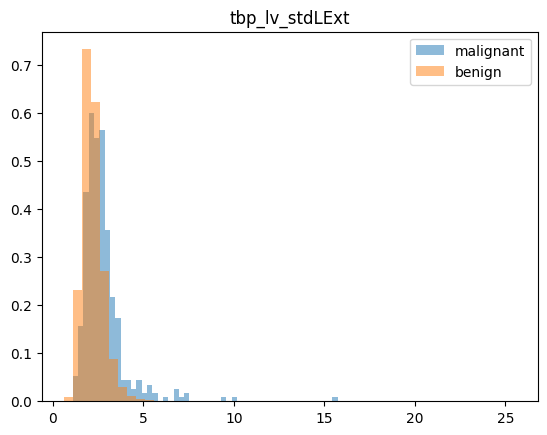

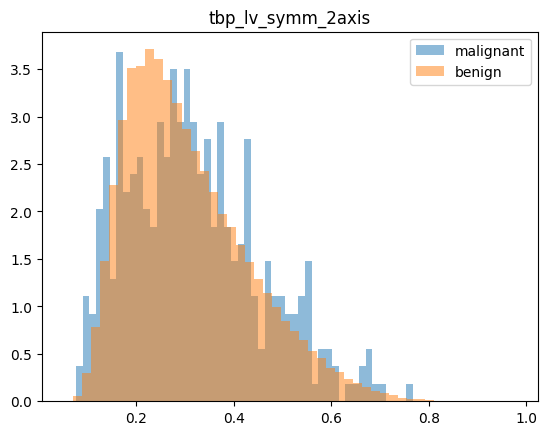

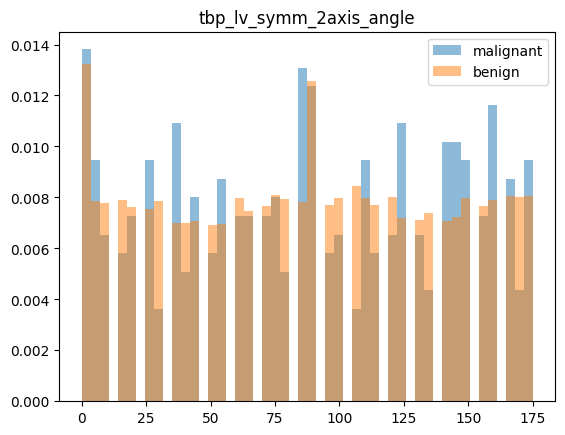

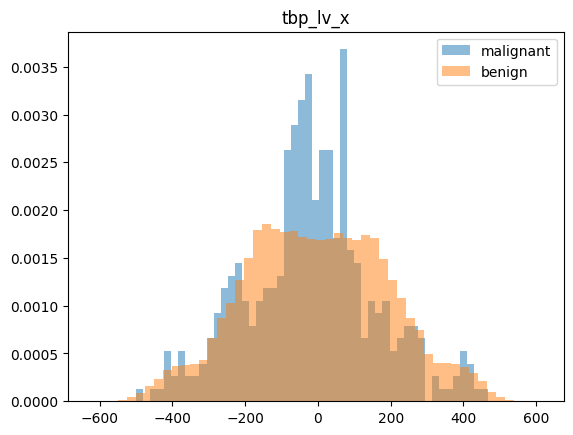

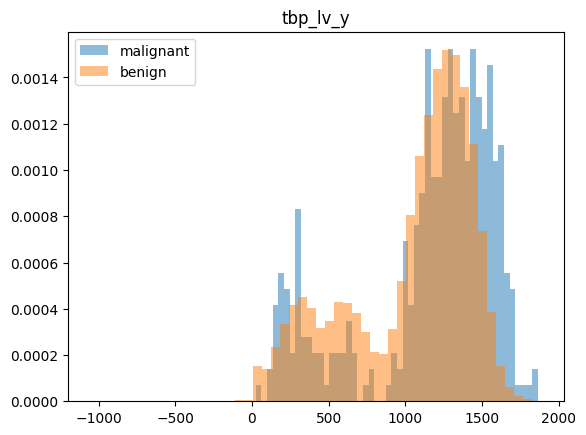

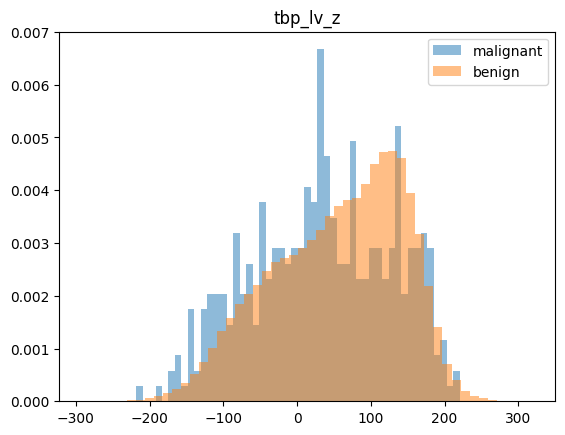

Could not plot mel_thick_mm


/home/ubuntu/miniconda3/envs/tf-v2/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/ubuntu/miniconda3/envs/tf-v2/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


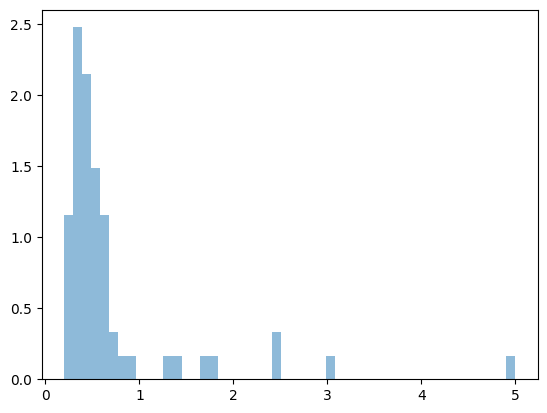

In [17]:
# Iterate through the columns and plot the distribution of the data for both the beningn and malignant classes 
for col in df_0.columns:
    if col == "target" or col == "age":
        continue
    # Normalize and show
    try: 
        plt.hist(mal_df[col], bins=50, alpha=0.5, label="malignant", density=True)
        plt.hist(ben_df[col], bins=50, alpha=0.5, label="benign", density=True)
        plt.title(col)
        plt.legend()
        plt.show()
        plt.close()
    except ValueError: 
        print(f"Could not plot {col}")